In [1]:
#Importing Data from the CSV file
%matplotlib inline
import string
import math
import numpy as np
import matplotlib.pyplot as plt
import pickle

f_train = open("training.1600000.processed.noemoticon.csv", "r", encoding="ISO-8859-1")
X_train = f_train.readlines()
f_test = open("testdata.manual.2009.06.14.csv", "r")
X_test = f_test.readlines()

#Creating the List with just the tweets and finding the number of positive and negative classes. (TRAINING) 
#class_0 = number of classes with label = 0
#class_4 = number of classes with label = 4

class_0=class_4=0
tweets_train =[]
for x in X_train:
    a = x.split('","')
    if (a[0] == '"0'): class_0+=1
    else: class_4+=1
    tweets_train.append('%s"|"%s' % (a[0],a[-1]))

#Creating the List with just the tweets (TEST DATA)
tweets_test =[]
for x in X_test:
    a = x.split('","')
    tweets_test.append('%s"|"%s' % (a[0], a[-1]))
    
print("The length of the training set is = ", len(X_train))
print("The number of classes (label=4) =", class_4)
print("The number of classes (label=0) =", class_0)
print("The length of the test set is = ", len(X_test))

f_test.close()
f_train.close()

m= len(X_train)
phi_0 = class_0/m
phi_4 = class_4/m

The length of the training set is =  1600000
The number of classes (label=4) = 800000
The number of classes (label=0) = 800000
The length of the test set is =  359


In [2]:
from nltk.tokenize import word_tokenize
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import TweetTokenizer
from nltk.stem import WordNetLemmatizer
nltk.download('stopwords')
nltk.download('wordnet')
import pandas as pd

[nltk_data] Downloading package stopwords to /home/ayushi/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/ayushi/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [3]:
tweets_train_pd = pd.read_pickle('tweet_train_lemma.pkl')
tweets_test_pd = pd.read_pickle('tweet_test_lemma.pkl')
train_classes = pd.read_pickle('train_class.pkl')
test_actual_classes = pd.read_pickle('test_class.pkl')

In [4]:
#Create Dictionary
import time

def create_dict(tweets, train_classes):
    start = time.time()
    dictionary = {}
    dict_0 = {}
    dict_4 = {}
    n = []
    n_0 =[]
    n_4 = []
    for i in range(len(tweets)):
        x = tweets.get(i)
        n.append(len(x))
        if (train_classes.get(i) == '"0"'): n_0.append(len(x)) 
        else: n_4.append(len(x))
            
        for w in x:
    #Global Vocabulary
            if w in dictionary:
                dictionary[w]+=1
            else:
                dictionary[w]=1
    #build Vocabulary for class 0 (-ve class)
            if (train_classes.get(i) == '"0"'):
                if w in dict_0:
                    dict_0[w]+=1
                else:
                    dict_0[w]=1
    #build Vocabulary for class 4 (+ve class)
            else:
                if w in dict_4:
                    dict_4[w]+=1
                else:
                    dict_4[w]=1

    end = time.time()                
    print("Time to Create Dictionary =", end-start)
    return dictionary, dict_0, dict_4, n, n_0, n_4;

In [5]:
def train_nb_classifier(dictionary, dict_0, dict_4, len_tweets, n_0, n_4, class_0, class_4):
    v = len(dictionary)
    theta_0 = {}
    theta_4 = {}
    n_0 = sum(n_0) # Sum of all the length of the tweets in class 0
    n_4 = sum(n_4) # Sum of all the length of the tweets in class 0
    c=1
    for word in dictionary.keys():
            if word in dict_0:
                theta_0[word] = ((dict_0[word]+c)/(n_0 + v*c))
            else:
                theta_0[word] = ((c) / (n_0 + v*c))
            if word in dict_4:
                theta_4[word] = ((dict_4[word]+c)/(n_4 + v*c))
            else:
                theta_4[word] = ((c)/(n_4 + v*c))
    return theta_0,theta_4;

In [6]:
def test_data(tweets, theta_0, theta_4, actual_classes, phi_0, phi_4):
    pred_class=[]
    #actual_class=[]
    for x in tweets:
        test_class0=test_class4=0
        
        #Finding probability of tweet being in a class         
        for w in x:
            if w in theta_0: test_class0 += math.log(theta_0[w])
            else: test_class0 += math.log(1)
            if w in theta_4: test_class4 += math.log(theta_4[w])
            else: test_class4 += math.log(1)
        test_class0 += math.log(phi_0)
        test_class4 += math.log(phi_4)
        #Classifying the probability into classes
        if (test_class0 > test_class4): pred_class.append(0)
        else: pred_class.append(1)

    actual_class = actual_classes.apply(lambda x: 0 if x=='"0"' else 1).tolist()
    test_error = sum(np.bitwise_xor(actual_class, pred_class))
    accuracy = ((len(tweets) - test_error)/len(tweets))*100
    return accuracy, actual_class, pred_class;

In [7]:
dictionary_raw, dict_0_raw, dict_4_raw, len_tweets, len_tweets_0, len_tweets_4 = create_dict(tweets_train_pd, train_classes)

Time to Create Dictionary = 257.1054575443268


In [61]:
dictionary_raw

{'awww': 8266,
 'thats': 31380,
 'bummer': 1563,
 'shoulda': 358,
 'get': 173049,
 'david': 2514,
 'carr': 75,
 'third': 837,
 'day': 103908,
 'upset': 3026,
 'cant': 63385,
 'update': 9180,
 'facebook': 4378,
 'texting': 757,
 'might': 9706,
 'cry': 8636,
 'result': 1687,
 'school': 20893,
 'today': 68435,
 'also': 10406,
 'blah': 1653,
 'dive': 361,
 'many': 8859,
 'time': 65790,
 'ball': 1985,
 'manage': 1669,
 'save': 3745,
 '50': 1455,
 'rest': 5843,
 'go': 164264,
 'bind': 438,
 'whole': 5974,
 'body': 2721,
 'feel': 51158,
 'itchy': 457,
 'like': 82774,
 'fire': 1968,
 'behave': 230,
 'im': 181568,
 'mad': 3893,
 'see': 57218,
 'crew': 688,
 'need': 43316,
 'hug': 5205,
 'hey': 19051,
 'long': 20335,
 'yes': 19995,
 'rain': 17091,
 'bite': 12781,
 'lol': 58656,
 'fine': 4661,
 'thank': 58599,
 'hows': 2658,
 'nope': 2690,
 'didnt': 27108,
 'que': 573,
 'muera': 1,
 'spring': 1248,
 'break': 13558,
 'plain': 434,
 'city': 3925,
 'snow': 1034,
 'repierced': 15,
 'ear': 1985,
 'cou

Text(0, 0.5, 'No of words')

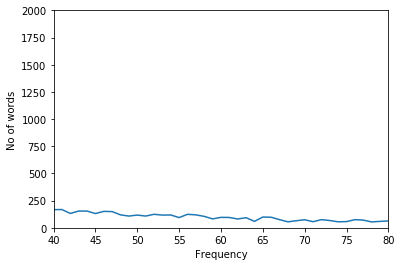

In [62]:
nw = [0 for i in range(max(dictionary_raw.values())+1)] 
f = [i for i in range(max(dictionary_raw.values())+1)] 
for key in dictionary_raw:
    nw[dictionary_raw[key]]+=1
plt.plot(f,nw)
plt.axis([40, 80, 0, 2000])
plt.xlabel("Frequency")
plt.ylabel("No of words")
#plt.show()

In [63]:
# (1) Feature - We see that the number of words with very less frequency is very high. So we can actually 
# Discard those words since they will not play much role in deciding the class of a tweet
# This would be for words like numbers, or language specific words like muera, wrong spelling words, etc. 
# We don't need to modify dict_0 and dict_4 since they will only be accessed for words found in the global
# dictionary 

cutoff_freq = 40 #40 is the optimum for 83% accuracy
n_cutoff = len(dictionary_raw)-sum(nw[0:cutoff_freq]) 
print("Number of words with frequency higher than cutoff frequency({}) :".format(cutoff_freq),n_cutoff)

Number of words with frequency higher than cutoff frequency(40) : 11965


In [64]:
dictionary_raw_new = {}
for key in dictionary_raw:
    if dictionary_raw[key] >=cutoff_freq:
        dictionary_raw_new[key]=dictionary_raw[key]

In [65]:
theta_0_raw, theta_4_raw = train_nb_classifier(dictionary_raw_new, dict_0_raw, dict_4_raw, len_tweets, len_tweets_0, len_tweets_4, class_0, class_4)

In [66]:
train_accuracy,actual_class_train,pred_class_train = test_data(tweets_train_pd, theta_0_raw, theta_4_raw, train_classes, phi_0, phi_4)
print("Result (a) : The train accuracy of the model on raw data is = {}%".format(train_accuracy))

Result (a) : The train accuracy of the model on raw data is = 76.7876875%


In [67]:
test_accuracy, actual_class,pred_class = test_data(tweets_test_pd, theta_0_raw, theta_4_raw, test_actual_classes, phi_0, phi_4)
print("Result (a) : The test accuracy of the model on raw data is = {}%".format(test_accuracy))

Result (a) : The test accuracy of the model on raw data is = 82.72980501392759%


In [21]:
import itertools 

tweets_test =tweets_test_pd.apply(lambda x: list(map(list, zip(x, x[1:],x[2:]))))
tweets_test['trigrams_str']=tweets_test.apply(lambda x: [' '.join(x[i]) for i in range(len(x))])

In [22]:
tweets_test['trigrams_str']

0      [looovvveee kindle 2, kindle 2 dx, 2 dx cool, ...
1      [read kindle 2, kindle 2 love, 2 love lee, lov...
2      [ok first assesment, first assesment kindle2, ...
3      [youll love kindle, love kindle 2, kindle 2 iv...
4      [fair enough kindle, enough kindle 2, kindle 2...
                             ...                        
354    [use latex lot, latex lot typeset, lot typeset...
355    [note hate word, hate word hate, word hate pag...
356    [ahhh back real, back real text, real text edi...
357    [trouble iran see, iran see hmm, see hmm iran,...
358    [read tweet come, tweet come iran, come iran w...
Length: 359, dtype: object

In [23]:
tweets_train=tweets_train_pd.apply(lambda x: list(map(list, zip(x, x[1:], x[2:]))))
tweets_train['trigrams_str']=tweets_train.apply(lambda x: [' '.join(x[i]) for i in range(len(x))])

In [24]:
dictionary_trigrams_1, dict_0_trigrams, dict_4_trigrams, len_trigrams, len_trigrams_0, len_trigrams_4 = create_dict(tweets_train['trigrams_str'], train_classes)

Time to Create Dictionary = 197.50172352790833


In [25]:
f = open("dictionary_trigrams.pkl","wb")
pickle.dump(dictionary_trigrams_1,f)
f.close()

f = open("dict_0_trigrams.pkl", "wb")
pickle.dump(dict_0_trigrams, f)
f.close()

f = open("dict_4_trigrams.pkl", "wb")
pickle.dump(dict_4_trigrams, f)
f.close()


In [124]:
dictionary_trigrams_1 = pd.read_pickle("dictionary_trigrams.pkl")
dict_0_trigrams = pd.read_pickle("dict_0_trigrams.pkl")
dict_4_trigrams = pd.read_pickle("dict_4_trigrams.pkl")


Text(0, 0.5, 'No of words')

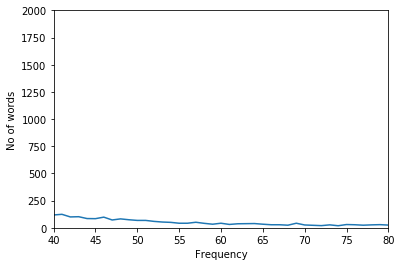

In [125]:
nw = [0 for i in range(max(dictionary_trigrams_1.values())+1)] 
f = [i for i in range(max(dictionary_trigrams_1.values())+1)] 
for key in dictionary_trigrams_1:
    nw[dictionary_trigrams_1[key]]+=1
plt.plot(f,nw)
plt.axis([40, 80, 0, 2000])
plt.xlabel("Frequency")
plt.ylabel("No of words")
#plt.show()

In [126]:
# (2) Using TRIGRAMS - only consecutive words
# We don't need to modify dict_0 and dict_4 since they will only be accessed for words found in the global
# dictionary 

cutoff_freq = 10
n_cutoff = len(dictionary_trigrams_1)-sum(nw[0:cutoff_freq]) 
print("Number of words with frequency higher than cutoff frequency({}) :".format(cutoff_freq),n_cutoff)

Number of words with frequency higher than cutoff frequency(100) : 666


In [127]:
dictionary_trigrams_new = {}
for key in dictionary_trigrams_1:
    if dictionary_trigrams_1[key] >=cutoff_freq:
        dictionary_trigrams_new[key]=dictionary_trigrams_1[key]

In [128]:
dictionary_trigrams_new.update(dictionary_raw_new)
dict_0_trigrams.update(dict_0_raw)
dict_4_trigrams.update(dict_4_raw)

In [129]:
theta_0_trigrams, theta_4_trigrams = train_nb_classifier(dictionary_trigrams_new, dict_0_trigrams, dict_4_trigrams, len_tweets, len_tweets_0, len_tweets_4, class_0, class_4)

In [130]:
train_accuracy,actual_class_train,pred_class_train = test_data(tweets_train_pd+tweets_train['trigrams_str'], theta_0_trigrams, theta_4_trigrams, train_classes, phi_0, phi_4)
print("Result (a) : The train accuracy of the model on raw data is = {}%".format(train_accuracy))

Result (a) : The train accuracy of the model on raw data is = 76.916%


In [131]:
test_accuracy, actual_class,pred_class = test_data((tweets_test_pd+tweets_test['trigrams_str']), theta_0_trigrams, theta_4_trigrams, test_actual_classes, phi_0, phi_4)
print("Result (a) : The test accuracy of the model on raw data is = {}%".format(test_accuracy))

Result (a) : The test accuracy of the model on raw data is = 82.72980501392759%


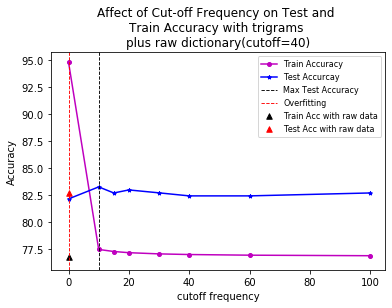

In [133]:
#Effect of cutoff-frequency on Train and Test Accuracy - Raw Dictionary(with cutoff=40)+Trigrams(with cutoff)
cutoff = [0, 10, 15, 20, 30, 40, 60, 100]
train_acc = [94.80, 77.50, 77.31, 77.20, 77.09, 77.03, 76.97, 76.92]
test_acc =  [82.17, 83.28, 82.72, 83.00, 82.73, 82.45, 82.45, 82.72]
plt.plot(cutoff, train_acc, marker='o', markersize=4, c='m', label='Train Accuracy')
plt.plot(cutoff, test_acc, marker='*', markersize=4, c='b', label ='Test Accurcay')
plt.axvline(x=10, c='k', linestyle='--', linewidth=0.9, label='Max Test Accuracy')
plt.axvline(x=0, c='r', linestyle='--', linewidth=0.9, label='Overfitting')
plt.scatter(0,76.78, marker='^', s=30, c='k', label='Train Acc with raw data')
plt.scatter(0,82.72, marker='^', s=30, c='r', label='Test Acc with raw data')

plt.xlabel("cutoff frequency")
plt.ylabel("Accuracy")
plt.legend(fontsize=8)
plt.title("Affect of Cut-off Frequency on Test and \nTrain Accuracy with trigrams \nplus raw dictionary(cutoff=40)")
plt.savefig("Accuracy_with_trigrams_and_Raw_with_cutoff.png",dpi=1000, bbox_inches='tight')
plt.show()